# Plots to verify agreement between best model and $\zeta$ Ophiuchi observable
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_30_M2_17_P100_Z0.01/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/weak_wind/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/do_J_accretion/"
binary = folder+"/binary_to_postRLOF/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

re-run\_exponential


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


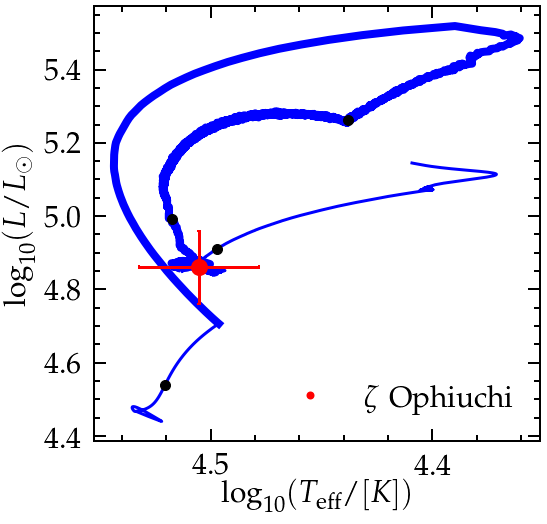

In [4]:
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

plot_HRD(ax, hfile1=hfile1, c="b", hfile2=hfile2, bfile=bfile)
zeta_oph_HRD(ax)
ax.plot(np.nan,np.nan, "ro",label=r"$\zeta \ \mathrm{Ophiuchi}$" )
ax.legend()
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")


LOGS = folder+"binary_to_postRLOF/LOGS2/"
LOGS_single = folder+"accretor_to_TAMS/LOGS/" 
profiles =  [LOGS+'/profile31.data',  # model_number = 1500
             LOGS+'/profile81.data',  # model_number = 4000
             LOGS+'/profile111.data', # model_number = 5500
             LOGS_single+'/profile11.data']

for p in profiles:
    with open(p, "r") as prof:
        for i, line in enumerate(prof):
            if i == 1:
                col = line.split()
                # print(col)
            if i ==2:
                Teff = np.log10(float(line.split()[col.index("Teff")]))
                L  = np.log10(float(line.split()[col.index("photosphere_L")]))
                # print(Teff, L)
                break
            
    ax.scatter(Teff, L, c='k',s=100,zorder=1000)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  from ipykernel import kernelapp as app


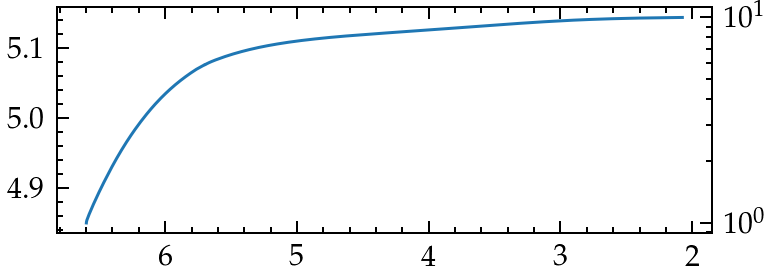

In [99]:
# accretor luminosity and Eddington ratio
def L_and_Edd_ratio(hfile):
    src, col = getSrcCol(hfile)
    l = src[:, col.index("log_L")]
    l_div_ledd = src[:, col.index("log_L_div_Ledd")]
    t = src[:, col.index("star_age")]
    fig = plt.figure(figsize=(12.5,10))
    gs = gridspec.GridSpec(120, 100)
    ax = fig.add_subplot(gs[:50,:94])
    bx = ax.twinx()
    t = np.log10(t[-1]-t)
    ax.plot(t, l)
    bx.plot(t, l_div_ledd,c='r')
    ax.invert_xaxis()
    bx.set_yscale('log')

# test
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
L_and_Edd_ratio(hfile2)

In [168]:
# get some numbers

# donor TAMS to RLOF delay
# get TAMS age
src, col = getSrcCol(dhfile)
# print(col)
h = src[:, col.index("center_h1")]
t = src[:, col.index("star_age")]*1e-3
iHdepl = h <= 1e-4
t_TAMS = min(t[iHdepl])
# get time of initial RLOF
src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
t = src[:, col.index("age")]*1e-3
iRLOF = rl_relative_gap_1 > 0
t_RLOF_init = min(t[iRLOF])
print("delay donor TAMS and RLOF", f"{t_RLOF_init-t_TAMS}", "1000 yr")
print("TAMS donor", f"{t_TAMS*1e-3:.2f}")


# radial expansion accretor during RLOF
src, col = getSrcCol(hfile1)
radius=src[:, col.index("radius")]
print(min(radius[iRLOF]), max(radius[iRLOF]))
print("RLOF duration", max(t[iRLOF])-min(t[iRLOF]))
# h mass fraction accretor at onset RLOF
h1 = src[:, col.index("center_h1")]
print("H at onset RLOF:", max(h1[iRLOF]))


delay donor TAMS and RLOF 8.378406434550925 1000 yr
TAMS donor 7.24
7.643018023706905 35.01073553356388
RLOF duration 9.676126523234416
H at onset RLOF: 0.41013899247639346


In [101]:
src, col = getSrcCol(bfile)
print(col)
m1 = src[:, col.index("star_1_mass")]
m2 = src[:, col.index("star_2_mass")]

mass_lost = max(m1[iRLOF])-min(m1[iRLOF])
print("total M1 lost", f"{mass_lost:.2f}")
mass_accreted = np.absolute(max(m2[iRLOF])-min(m2[iRLOF]))
print("total M2 accreted", f"{mass_accreted:.2f}")

['model_number', 'age', 'period_days', 'binary_separation', 'v_orb_1', 'v_orb_2', 'rl_1', 'rl_2', 'rl_relative_overflow_1', 'rl_relative_overflow_2', 'star_1_mass', 'star_2_mass', 'lg_mtransfer_rate', 'lg_mstar_dot_1', 'lg_mstar_dot_2', 'lg_system_mdot_1', 'lg_system_mdot_2', 'lg_wind_mdot_1', 'lg_wind_mdot_2', 'fixed_xfer_fraction', 'eff_xfer_fraction', 'J_orb', 'Jdot', 'jdot_mb', 'jdot_gr', 'jdot_ml', 'jdot_ls', 'jdot_missing_wind', 'extra_jdot', 'donor_index', 'point_mass_index']
total M1 lost 10.60
total M2 accreted 3.37


Text(3.897757739165338, 4.929187260231254, '$\\mathrm{C}$')

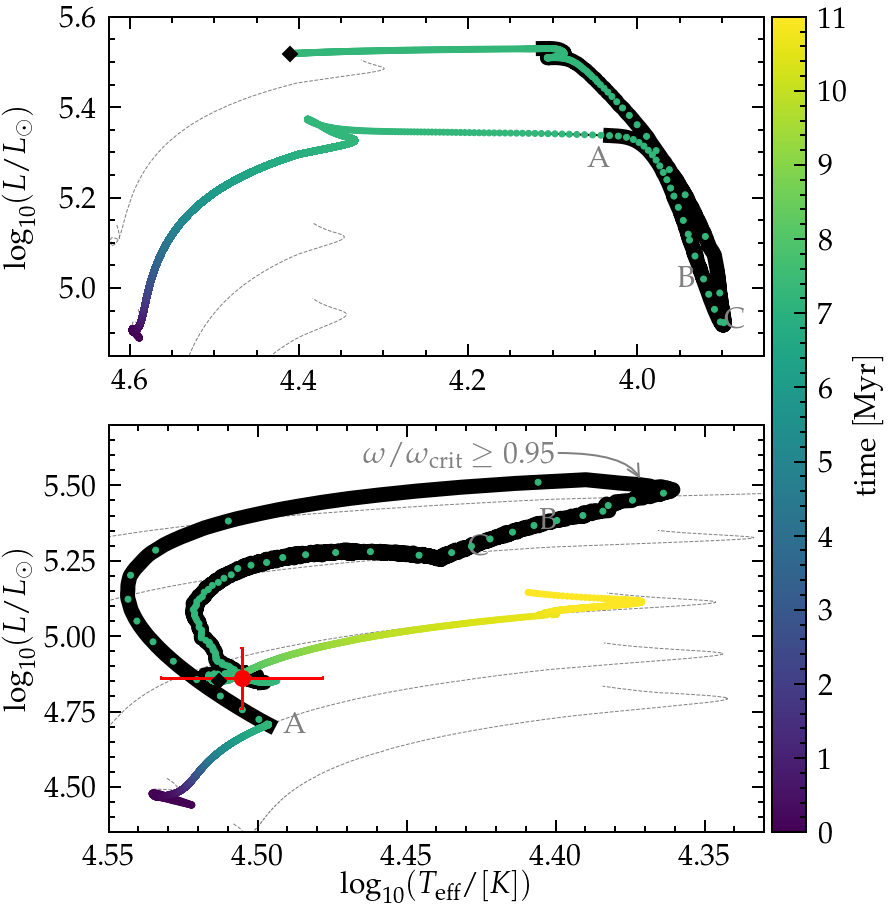

In [203]:
# both HRD
fig = plt.figure(figsize=(12.5,15))
gs = gridspec.GridSpec(120, 100)
ax = fig.add_subplot(gs[:50,:94])
ax2 = fig.add_subplot(gs[60:,:94])
cax = fig.add_subplot(gs[:,95:])


# single stars in the background
root_single  = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01"
single_star_masses = glob.glob(root_single+'/*/')
for ss in single_star_masses:
    h = ss+'/non_rot/LOGS/history.data'
    logL, logTeff = getlogLlogTeff(h)
    ax.plot(logTeff,logL, c="#808080", ls='--', lw=1, zorder=0)
    ax2.plot(logTeff,logL, c="#808080", ls='--', lw=1, zorder=0)

# for time [in Myrs]
vmin=0
vmax=11
# define discrete colormap
cmap = plt.cm.viridis #summer #plasma #inferno #viridis #hsv# gnuplot #
# norm = mpl.colors.BoundaryNorm(np.arange(vmin, vmax, 11), cmap.N)
# extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(cmap.N)]

# # create the new map
# cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# # define the bins and normalize
# Ncolors = 12#23
# bounds = np.linspace(vmin, vmax, Ncolors)
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
iRLOF = rl_relative_gap_1 > 0

# accretor
logL_accretor_bin, logTeff_accretor_bin = getlogLlogTeff(hfile1)

src, col = getSrcCol(hfile1)
time = src[:, col.index('star_age')]
# for annotations later
omega_div_omega_crit = src[:, col.index('surf_avg_omega_div_omega_crit')] 
ax2.plot(logTeff_accretor_bin, logL_accretor_bin, lw=2, c="k", zorder=0)

# interpolation
tx = np.arange(0, max(time[iRLOF]), 50)
logTeff_interp = np.interp(tx, time[iRLOF], logTeff_accretor_bin[iRLOF])
logL_interp =  np.interp(tx, time[iRLOF], logL_accretor_bin[iRLOF])
p = ax2.scatter(logTeff_interp, logL_interp, c=tx*1e-6, zorder=2,  vmin=vmin, vmax=vmax, cmap=cmap, # norm=norm,
                rasterized=True)
p = ax2.scatter(logTeff_accretor_bin[np.logical_not(iRLOF)], logL_accretor_bin[np.logical_not(iRLOF)], c=time[np.logical_not(iRLOF)]*1e-6, zorder=2,  vmin=vmin, vmax=vmax, cmap=cmap, # norm=norm,
                rasterized=True)

# post-binary
logL_accretor_sin, logTeff_accretor_sin = getlogLlogTeff(hfile2)
src, col = getSrcCol(hfile2)

time_accretor_sin = src[:, col.index('star_age')]
# # tx = np.arange(0, max(time), 50)
# # logTeff_interp = np.interp(tx, time, logTeff)
# # logL_interp =  np.interp(tx, time, logL)
# # no need for interpolation on the slow evolution, one point every 50 years gives a continuous line
ax2.plot(logTeff_accretor_sin[0], logL_accretor_sin[0], marker='D', c='k', ms=10, zorder=100)
ax2.scatter(logTeff_accretor_sin, logL_accretor_sin, c=time_accretor_sin*1e-6, zorder=2,  vmin=vmin, vmax=vmax, cmap=cmap, # norm=norm,
            rasterized=True)
fig.colorbar(p, label="$\mathrm{time\ [Myr]}$", cax=cax, ticks=np.linspace(vmin, vmax, vmax+1))

zeta_oph_HRD(ax2)

# # donor
logL_donor, logTeff_donor = getlogLlogTeff(dhfile)
src, col = getSrcCol(dhfile)

time_donor = src[:, col.index('star_age')]
ax.plot(logTeff_donor, logL_donor, lw=2, c='k', zorder=0)
ax.plot(logTeff_donor[iRLOF], logL_donor[iRLOF], lw=15, c='k', zorder=0)
tx = np.arange(0, max(time_donor), 50)
logTeff_interp = np.interp(tx, time_donor, logTeff_donor)
logL_interp =  np.interp(tx, time_donor, logL_donor)
p = ax.scatter(logTeff_interp, logL_interp, c=tx*1e-6, zorder=2,  vmin=vmin, vmax=vmax, cmap=cmap,# norm=norm,
               rasterized=True)
ax.plot(logTeff_donor[-1], logL_donor[-1], marker='D', c='k', ms=10)

# # i = np.argmin(np.absolute(time-7.262e6))
# # print(time[i])
# # ax.plot(logTeff[i], logL[i], marker='*', c='b', ms=10)


# # add markers for points for profiles
# LOGS = folder+"binary_to_postRLOF/LOGS2/"
# LOGS_single = folder+"accretor_to_TAMS/LOGS/" 
# profiles =  [LOGS+'/profile31.data',  # model_number = 1500
#              LOGS+'/profile81.data',  # model_number = 4000
#              LOGS+'/profile111.data', # model_number = 5500
#              LOGS_single+'/profile11.data']

# for p in profiles:
#     with open(p, "r") as prof:
#         for i, line in enumerate(prof):
#             if i == 1:
#                 col = line.split()
#                 # print(col)
#             if i ==2:
#                 Teff = np.log10(float(line.split()[col.index("Teff")]))
#                 L  = np.log10(float(line.split()[col.index("photosphere_L")]))
#                 # print(Teff, L)
#                 break
            
#     ax2.scatter(Teff, L, c='b', marker='x', lw=2, s=500,zorder=10, rasterized=True)


ax.set_xlim(xmax=4.625,xmin=3.85)
ax.set_ylim(4.85,5.6)
ax2.set_xlim(xmax=4.55,xmin=4.33)
ax2.set_ylim(4.35, 5.7)
ax.invert_xaxis()
ax2.invert_xaxis()
ax2.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
ax2.set_ylabel(r"$\log_{10}(L/L_\odot)$")
# ax2.set_yticklabels([])
# ax2.set_xticklabels([])
fig.align_labels()

# annotate when reaching the maximum rotation
diff = np.absolute(omega_div_omega_crit[logL_accretor_bin>5.5]-0.95)
i_max_rot = np.argmin(diff)
# print(diff[i_max_rot]+0.95)
# visualize
# ax2.scatter(logTeff[i_max_rot], logL[i_max_rot], s=500, c='m', zorder=100)
ax2.annotate(r"$\omega/\omega_\mathrm{crit}\geq0.95$", 
             (logTeff_accretor_bin[logL_accretor_bin>5.5][i_max_rot], logL_accretor_bin[logL_accretor_bin>5.5][i_max_rot]+0.02), (4.4,5.56),
             color="#808080",
             arrowprops=dict(arrowstyle="->", relpos=(1.015,0.75), shrinkA=0.05,
                             shrinkB=0.0,
                             facecolor='#808080', lw=2, edgecolor="#808080",
                             connectionstyle="angle3,angleA=0,angleB=120"),
             # va="center",
             ha="right", fontsize=30)

# get time of initial RLOF
ax2.plot(logTeff_accretor_bin[iRLOF], logL_accretor_bin[iRLOF], lw=15, c='k', zorder=0)

# now annotate letters
src, col = getSrcCol(bfile)
t = src[:, col.index("age")]*1e-6
lg_mtransfer_rate = src[:, col.index('lg_mtransfer_rate')]
lg_mstar_dot_1 = src[:, col.index('lg_mstar_dot_1')]
lg_mstar_dot_2 = src[:, col.index('lg_mstar_dot_2')]
lg_system_mdot_1 = src[:, col.index('lg_system_mdot_1')]
lg_system_mdot_2 = src[:, col.index('lg_system_mdot_2')]
lg_wind_mdot_1 = src[:, col.index('lg_wind_mdot_1')]
lg_wind_mdot_2 = src[:, col.index('lg_wind_mdot_2')]


# # RLOF start
ax2.text(logTeff_accretor_bin[iRLOF][0]-0.005, logL_accretor_bin[iRLOF][0],
         "$\mathrm{A}$", fontsize=30, zorder=0, ha="left", va="center",
         color="#808080")
ax.text(logTeff_donor[iRLOF][0], logL_donor[iRLOF][0]-0.05,
        "$\mathrm{A}$", fontsize=30, zorder=0, ha="right",
        va="center", color="#808080")

ind = (t>7.2535) & (t<7.254)
j = np.argmin(lg_mstar_dot_2[ind] - lg_mtransfer_rate[ind])
ax2.text(logTeff_accretor_bin[ind][j], logL_accretor_bin[ind][j], "$\mathrm{B}$", fontsize=30, zorder=0, ha="right", va="center", color="#808080")
ax.text( logTeff_donor[ind][j]+0.01, logL_donor[ind][j], "$\mathrm{B}$", fontsize=30, zorder=0, ha="right", va="center", color="#808080")

imax = np.argmax(lg_mtransfer_rate[t>7.252])
ax2.text(logTeff_accretor_bin[t>7.252][imax], logL_accretor_bin[t>7.252][imax], "$\mathrm{C}$", fontsize=30, zorder=0, ha="left", va="center", color="#808080")
ax.text(logTeff_donor[t>7.252][imax], logL_donor[t>7.252][imax], "$\mathrm{C}$", fontsize=30,  zorder=0, ha="left", va="center", color="#808080")


# get minimum RLOF
imin = np.argmin(lg_mtransfer_rate[(t>7.254) & (t<7.260)])
ax.text(t[(t>7.254) & (t<7.260)][imin], -4.7, "$\mathrm{D}$", fontsize=30, c='k', zorder=0, ha="center", va="center", color="#808080")
bx.text(t[(t>7.254) & (t<7.260)][imin], -4.4, "$\mathrm{D}$", fontsize=30, c='k', zorder=0, ha="center", va="center", color="#808080")

# get second non-conservative part
imax = np.argmax(lg_mtransfer_rate[t>7.26])
ax.text(t[t>7.26][imax], -3.5, "$\mathrm{E}$", fontsize=30, c='k', zorder=0, ha="left", va="center", color="#808080")
bx.text(t[t>7.26][imax], -3.5, "$\mathrm{E}$", fontsize=30, c='k', zorder=0, ha="left", va="center", color="#808080")


# get detachment
ax.text(t[iRLOF][-1]+2e-4, lg_mstar_dot_2[iRLOF][0]+2.2, "$\mathrm{F}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")
bx.text(t[iRLOF][-1]+2e-4, lg_mstar_dot_1[iRLOF][0]+1.3, "$\mathrm{F}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")



# fig.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/HRD_both.pdf", rasterized=True)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


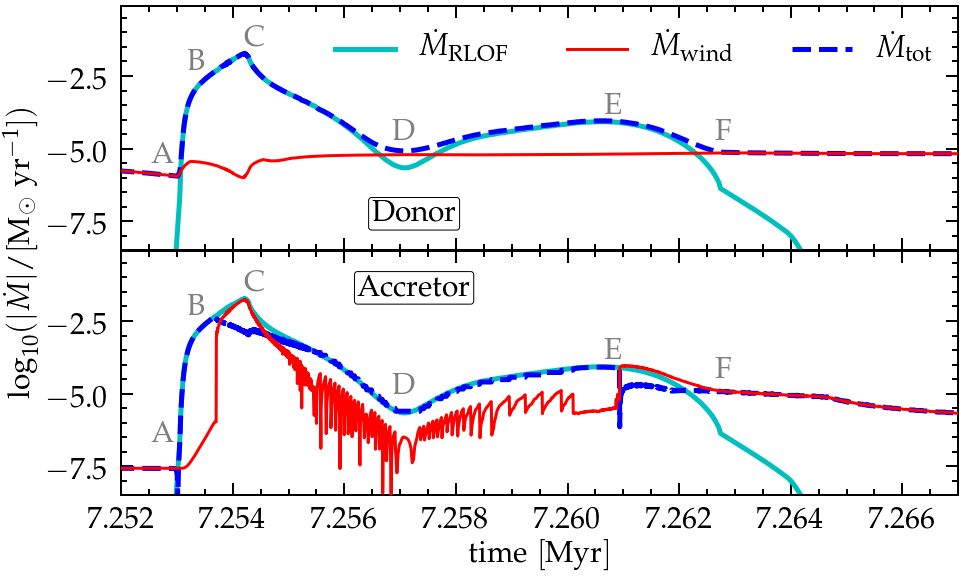

In [190]:
# mass transfer rate
fig = plt.figure(figsize=(15,9))
# gs = gridspec.GridSpec(120, 100)
# ax = fig.add_subplot(gs[70:120,:])
# bx = fig.add_subplot(gs[20:70,:])
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[50:,:])
bx = fig.add_subplot(gs[:50,:])

src, col = getSrcCol(bfile)
lg_mtransfer_rate = src[:, col.index('lg_mtransfer_rate')]
lg_mstar_dot_1 = src[:, col.index('lg_mstar_dot_1')]
lg_mstar_dot_2 = src[:, col.index('lg_mstar_dot_2')]
lg_system_mdot_1 = src[:, col.index('lg_system_mdot_1')]
lg_system_mdot_2 = src[:, col.index('lg_system_mdot_2')]
lg_wind_mdot_1 = src[:, col.index('lg_wind_mdot_1')]
lg_wind_mdot_2 = src[:, col.index('lg_wind_mdot_2')]
# beta = src[:, col.index("eff_xfer_fraction")]
t = src[:, col.index("age")]*1e-6
# t = np.log10(t[-1]-t)
# print(col)
ax.plot(t, lg_mtransfer_rate, lw=5, c='c')
bx.plot(t, lg_mtransfer_rate, lw=5, c='c', label="$\dot M_\mathrm{RLOF}$")

ax.plot(t, lg_wind_mdot_2, c='r', zorder=10)
bx.plot(t, lg_wind_mdot_1, c='r', zorder=10, label=r"$\dot M_\mathrm{wind}$")

ax.plot(t, lg_mstar_dot_2, lw=5, ls='--', c='b')
bx.plot(t, lg_mstar_dot_1, lw=5, ls='--', c='b', label="$\dot M_\mathrm{tot}$")


# top_ax = fig.add_subplot(gs[:20,:])
# # top ax
# top_ax.plot(t, beta)
# top_ax.set_ylabel(r"$\beta_\mathrm{RLOF}$")
# # top_ax.set_xlim(0,1)
# print(max(beta))

bx.legend(ncol=3)

ax.text(0.35,0.85, "$\mathrm{Accretor}$", va="center", ha="center",fontsize=30, transform=ax.transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.1'))
bx.text(0.35,0.15, "$\mathrm{Donor}$", va="center", ha="center",fontsize=30, transform=bx.transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.1'))


ax.set_ylabel(r"$\log_{10}(|\dot{M}|/\mathrm{[M_\odot \ yr^{-1}]})$",  horizontalalignment='center', y=1.)
#ax.set_xlim(xmin=5.72, xmax=5.74)
# ax.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t \ \mathrm{[yr]})$")
ax.set_xlabel(r"$\mathrm{time} \ \mathrm{[Myr]}$")
bx.set_xlabel("")
bx.set_xticklabels([])
top_ax.set_xticklabels([])
ax.set_xlim(xmin=7.252, xmax=7.267)
top_ax.set_ylim(-0.1, max(beta))
ax.set_ylim(ymin=-8.5, ymax=-0.1)
bx.set_xlim(ax.get_xlim())
top_ax.set_xlim(ax.get_xlim())
bx.set_ylim(ax.get_ylim())
fig.align_labels()

# label placing

# get time of initial RLOF
src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
iRLOF = rl_relative_gap_1 > 0
ax.text(t[iRLOF][0]-1e-4, lg_mstar_dot_2[iRLOF][0], "$\mathrm{A}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")
bx.text(t[iRLOF][0]-1e-4, lg_mstar_dot_1[iRLOF][0]+0.5, "$\mathrm{A}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")

# get time start non-conservative
ind = (t>7.2535) & (t<7.254)
j = np.argmin(lg_mstar_dot_2[ind] - lg_mtransfer_rate[ind])
ax.text(t[ind][j]-5e-4, -2., "$\mathrm{B}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")
bx.text(t[ind][j]-5e-4, -2., "$\mathrm{B}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")


# get peak RLOF mass transfer
imax = np.argmax(lg_mtransfer_rate[t>7.252])
ax.text(t[t>7.252][imax], -1.2, "$\mathrm{C}$", fontsize=30, c='k', zorder=0, ha="left", va="center", color="#808080")
bx.text(t[t>7.252][imax], -1.2, "$\mathrm{C}$", fontsize=30, c='k', zorder=0, ha="left", va="center", color="#808080")

# get minimum RLOF
imin = np.argmin(lg_mtransfer_rate[(t>7.254) & (t<7.260)])
ax.text(t[(t>7.254) & (t<7.260)][imin], -4.7, "$\mathrm{D}$", fontsize=30, c='k', zorder=0, ha="center", va="center", color="#808080")
bx.text(t[(t>7.254) & (t<7.260)][imin], -4.4, "$\mathrm{D}$", fontsize=30, c='k', zorder=0, ha="center", va="center", color="#808080")

# get second non-conservative part
imax = np.argmax(lg_mtransfer_rate[t>7.26])
ax.text(t[t>7.26][imax], -3.5, "$\mathrm{E}$", fontsize=30, c='k', zorder=0, ha="left", va="center", color="#808080")
bx.text(t[t>7.26][imax], -3.5, "$\mathrm{E}$", fontsize=30, c='k', zorder=0, ha="left", va="center", color="#808080")


# get detachment
ax.text(t[iRLOF][-1]+2e-4, lg_mstar_dot_2[iRLOF][0]+2.2, "$\mathrm{F}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")
bx.text(t[iRLOF][-1]+2e-4, lg_mstar_dot_1[iRLOF][0]+1.3, "$\mathrm{F}$", fontsize=30, c='k', zorder=0, ha="right", va="center", color="#808080")

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/MT.pdf")



Text(0, 0.5, '$M_1+M_2 \\ [M_\\odot]$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


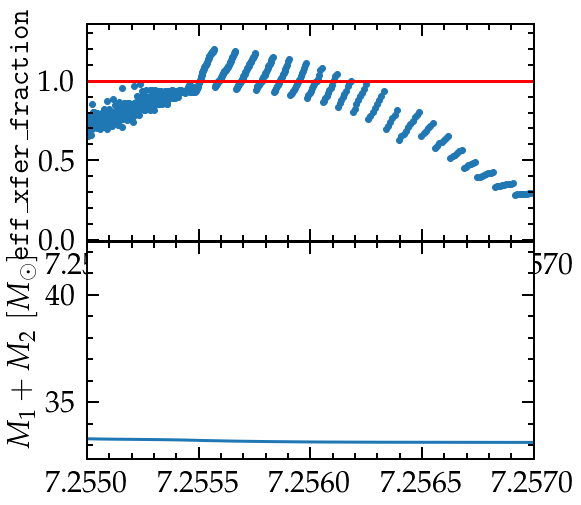

In [39]:
# print(col)
beta = src[:, col.index("eff_xfer_fraction")]
mtot = src[:, col.index('star_1_mass')]+src[:, col.index('star_2_mass')]
t = src[:, col.index("age")]*1e-6


fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:50,:])
bx = fig.add_subplot(gs[50:,:])
ax.scatter(t,beta)
bx.plot(t, mtot)
#ax.set_xlim(xmin=7.252, xmax=7.267)
bx.set_xlim(xmin=7.255, xmax=7.257)
ax.set_xlim(bx.get_xlim())
ax.axhline(1, 0,1, c='r')
ax.set_ylim(ymin=-0.01)
ax.set_xlabel(r"time \ [Myr]")
ax.set_ylabel(r"$\texttt{eff\_xfer\_fraction}$")
bx.set_ylabel(r"$M_1+M_2 \ [M_\odot]$")

Note: we use [Kolb & Ritter
1990](https://ui.adsabs.harvard.edu/abs/1990A%26A...236..385K/abstract)
to treat the mass transfer, which allows for optically thick
overflows, i.e. for the Roche lobe of the donor to be smaller than the
photosphere. 

Text(0, 0.5, '$R \\ [R_\\odot]$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


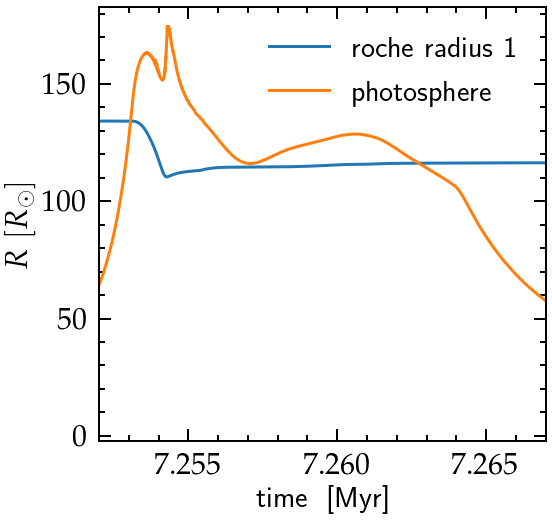

In [54]:
# does RL1 go below the donor's photosphere ever?
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

src, col = getSrcCol(bfile)
# get roche lobe
rl_1 = src[:, col.index("rl_1")]
t = src[:, col.index("age")]*1e-6 #Myrs
# get photosphere radius
src, col = getSrcCol(dhfile)
r1 = 10**src[:, col.index("photosphere_log_r")]

ax.plot(t, rl_1, label="roche radius 1")
ax.plot(t, r1, label="photosphere")
ax.legend()
ax.set_xlim(xmin=7.252, xmax=7.267)
# ax.set_xlim(xmin=7.2, xmax=7.3)
ax.set_xlabel(r"time \ [Myr]")
ax.set_ylabel(r"$R \ [R_\odot]$")

In [ ]:
# chemical composition
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

final_h1, final_he4, final_n14, final_c12, final_o16 = plot_surface_abundances(hfile1, hfile2, ax=ax)
ax.legend(handlelength=0.5, columnspacing=0.75, handletextpad=0.5, ncol=3, loc="best", fontsize=20)
ax.set_yscale('log')
ax.set_xlim(0,11.7)
print(f"{final_h1:0.5f}", f"{final_he4:0.5f}", f"{final_n14:0.5f}", f"{final_c12:0.5f}", f"{final_o16:0.5f}")
# plt.savefig("/mnt/home/mrenzo/TMP/composition_zeta.pdf")

Text(0, 0.5, '$\\kappa_\\mathrm{photosphere}$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


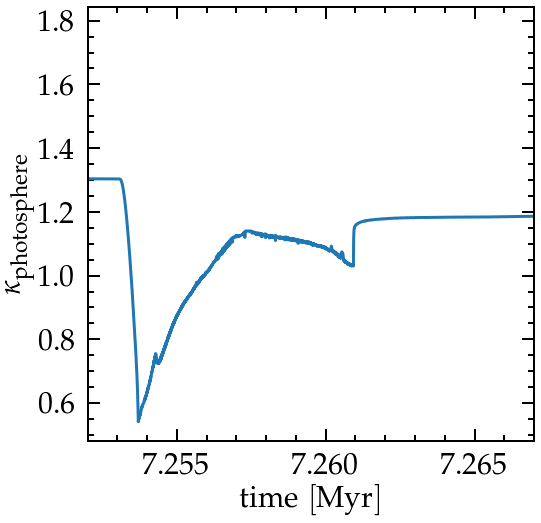

In [176]:
# surf mean molecular weight

src, col = getSrcCol(hfile1)
t = src[:, col.index("star_age")]*1e-6
kappa_surf = src[:, col.index("photosphere_opacity")]

src, col = getSrcCol(hfile2)
t = np.concatenate((t, src[:, col.index("star_age")]*1e-6))
kappa_surf = np.concatenate((kappa_surf, src[:, col.index("photosphere_opacity")]))

fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
ax.plot(t, kappa_surf)
ax.set_xlim(xmin=7.252, xmax=7.267)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_ylabel(r"$\kappa_\mathrm{photosphere}$")

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/../exponential_ov/binary_to_donor_Hedepl/


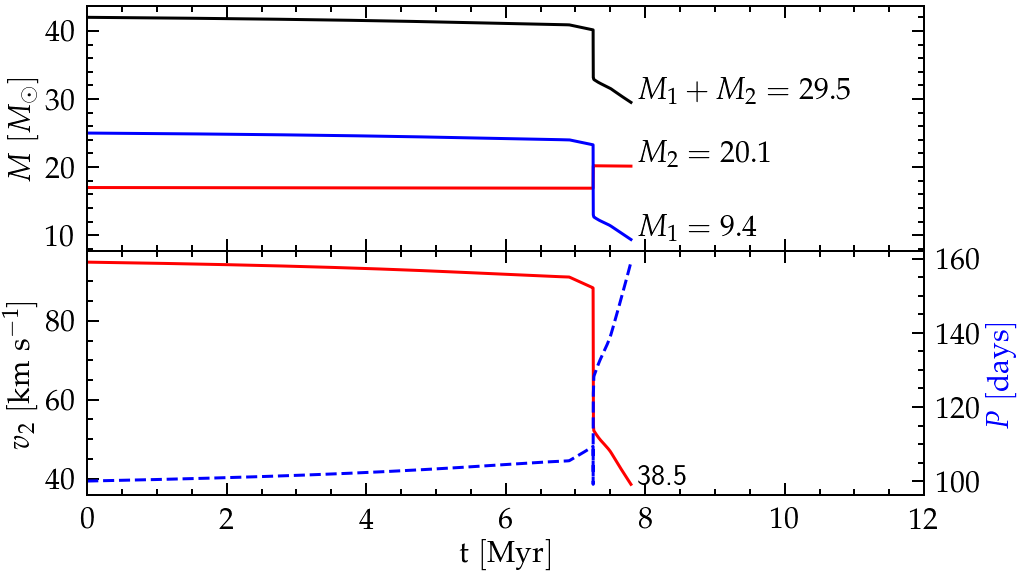

In [6]:
# orbital evolution
binary = folder+"../exponential_ov/binary_to_donor_Hedepl/"
MassVelocityEvolution(binary, figName="")

N.B: The kippenhahn diagrams do not show rotational mixing!!

172.5


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


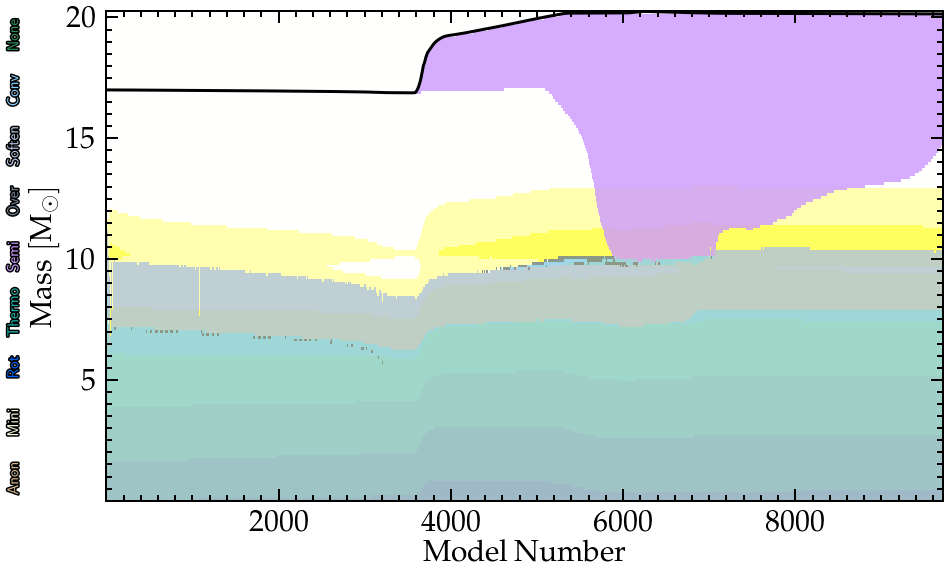

In [60]:
# Kippenhahn diagram
binary = folder+"../exponential_ov/binary_to_donor_Hedepl/"

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x =  'model_number' #
y =  'mass' #'radius' # 

mmm.loadHistory(f=binary+'/LOGS2')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.8,# mix_hatch='//', hatch_color='#98ef56',
             # age_lookback=True,
             age_log=True,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)

# plt.savefig("/mnt/home/mrenzo/TMP/kipp_mass.pdf")

In [ ]:
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x = 'model_number' # 'star_age' #
y = 'mass' # 'radius' #

mmm.loadHistory(f=binary+'/LOGS1/')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56',
             # age_lookback=True,
             age_log=False,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)
ax.set_ylim(ymin=12, ymax=13)

In [ ]:
src, col = getSrcCol(hfile2)
mix_type1 = src[:, col.index("mix_type_1")]
mix_type2 = src[:, col.index("mix_type_2")]
mix_type3 = src[:, col.index("mix_type_3")]
mix_type4 = src[:, col.index("mix_type_4")]
mix_type5 = src[:, col.index("mix_type_5")]
mix_type6 = src[:, col.index("mix_type_6")]
mix_type7 = src[:, col.index("mix_type_7")]
mix_type8 = src[:, col.index("mix_type_8")]
mix_type9 = src[:, col.index("mix_type_9")]
mix_type10 = src[:, col.index("mix_type_10")]
mix_type11 = src[:, col.index("mix_type_11")]
mix_type12 = src[:, col.index("mix_type_12")]
mix_type13 = src[:, col.index("mix_type_13")]
mix_type14 = src[:, col.index("mix_type_14")]
mix_type15 = src[:, col.index("mix_type_15")]
mix_type16 = src[:, col.index("mix_type_16")]
mix_type17 = src[:, col.index("mix_type_17")]
mix_type18 = src[:, col.index("mix_type_18")]
mix_type19 = src[:, col.index("mix_type_19")]
mix_type20 = src[:, col.index("mix_type_20")]
t = src[:, col.index("model_number")]

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


ax.scatter(t,mix_type1)
ax.scatter(t,mix_type2)
ax.scatter(t,mix_type3)
ax.scatter(t,mix_type4)
ax.scatter(t,mix_type5)
ax.scatter(t,mix_type6)
ax.scatter(t,mix_type7)
ax.scatter(t,mix_type8)
ax.scatter(t,mix_type9)
ax.scatter(t,mix_type10)
ax.scatter(t,mix_type11)
ax.scatter(t,mix_type12)
ax.scatter(t,mix_type13)
ax.scatter(t,mix_type14)
ax.scatter(t,mix_type15)
ax.scatter(t,mix_type16)
ax.scatter(t,mix_type17)
ax.scatter(t,mix_type18)
ax.scatter(t,mix_type19)
ax.scatter(t,mix_type20)

ax.set_xlabel(r"model number")
ax.set_ylabel(r"mix type")
ax.axhline(5)



In [ ]:
# spectroscopic HRD
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
plot_spectroscopic_HRD(ax, hfile1, c='k', hfile2=hfile2, label=model_name)
zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")